# Pocessing GWO hourly meteorological data
**Author: Jun Sasaki  Coded on February 13, 2022  Updated on February 14, 2022.**<br>
Extract and plot GWO (Ground Weather Observation) hourly data.

In [1]:
from metdata import gwo
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.dates import date2num, YearLocator, MonthLocator, DayLocator, DateFormatter
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters

# Set GWO/Hourly/ directory path containing GWO data
dirpath = "/mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/"
# %matplotlib inline

In [2]:
datetime_ini = "2019-12-1 00:00:00"
datetime_end = "2019-12-30 00:00:00"
#datetime_ini = "2010-9-2 00:00:00"
#datetime_end = "2010-9-3 00:00:00"
stn = "Tokyo"
met = gwo.Hourly(datetime_ini=datetime_ini, datetime_end=datetime_end,
                 stn=stn, dirpath=dirpath)

Start datetime = 2019-12-01 00:00:00
End datetime = 2019-12-30 00:00:00
Reading from /mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/Tokyo/Tokyo2018.csv
Successful with no missing row.
Reading from /mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/Tokyo/Tokyo2019.csv
Successful with no missing row.
Reading from /mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/Tokyo/Tokyo2020.csv
Successful with no missing row.


## Gets pandas DataFrame
pandas DataFrame can be obtained by invoking `.df` method

In [3]:
print(met.df.columns)
met.df.head()

Index(['KanID', 'Kname', 'KanID_1', 'lhpa', 'lhpaRMK', 'shpa', 'shpaRMK',
       'kion', 'kionRMK', 'stem', 'stemRMK', 'rhum', 'rhumRMK', 'muki',
       'mukiRMK', 'sped', 'spedRMK', 'clod', 'clodRMK', 'tnki', 'tnkiRMK',
       'humd', 'humdRMK', 'lght', 'lghtRMK', 'slht', 'slhtRMK', 'kous',
       'kousRMK', 'u', 'v'],
      dtype='object')


,KanID,Kname,KanID_1,lhpa,lhpaRMK,shpa,shpaRMK,kion,kionRMK,stem,...,humd,humdRMK,lght,lghtRMK,slht,slhtRMK,kous,kousRMK,u,v
2019-12-01 00:00:00,662,東京,662,1026.7,8,1029.7,8,5.5,8,6.3,...,0.5,8,0.0,2,0.0,2,0,2,2.586863,-1.071514
2019-12-01 01:00:00,662,東京,662,1026.4,8,1029.4,8,5.5,8,6.3,...,0.5,8,0.0,2,0.0,2,0,2,1.697056,-1.697056
2019-12-01 02:00:00,662,東京,662,1026.2,8,1029.2,8,5.7,8,6.5,...,0.9,8,0.0,2,0.0,2,0,2,2.771639,-1.148050
2019-12-01 03:00:00,662,東京,662,1026.0,8,1029.0,8,4.8,8,6.3,...,0.4,8,0.0,2,0.0,2,0,2,0.650562,-1.570595
2019-12-01 04:00:00,662,東京,662,1025.9,8,1028.9,8,5.4,8,6.1,...,0.0,8,0.0,2,0.0,2,0,2,1.414214,-1.414214


# Plot using [Matplotlib](https://matplotlib.org/stable/index.html)
Extract a 1D scalar or vector variable from DataFrame.

In [4]:
data = gwo.Data1D(df=met.df, col_1='kion')

## Example of scalar 1-D time series plot
- Rolling mean is applied to `Plot1D()` by setting its arguments of `window` in odd integer number and `center` (default is `True`).

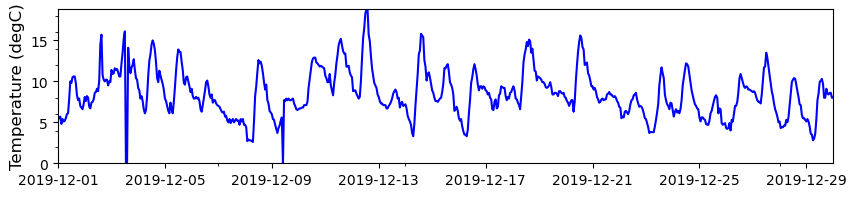

In [5]:
### xlim = (parse("2014-01-15"), parse("2014-02-16"))  ### ex. for datetime
ylabel='Temperature (degC)'
xlim = None
#xlim = (parse("1990-09-02"), parse("1992-09-03"))
dx = 7
ylim = None
dy = 2

## Set window=1 when no plot.
window=1
#try:
plot_config = gwo.Data1D_PlotConfig(xlim=xlim, ylim=ylim, 
                                    x_minor_locator=DayLocator(interval=dx),
                                    y_minor_locator = MultipleLocator(dy),
                                    format_xdata = DateFormatter('%Y-%m-%d'),
                                    ylabel = ylabel)
gwo.Plot1D(plot_config, data, window=window,
           center=True).save_plot('data.png', dpi=600)

## Example of time series wind vector plot with its speed

In [6]:
wind = gwo.Data1D(met.df, 'u', 'v')
print(wind.v[0:10])

[2.8 2.4 3.  1.7 2.  2.  1.9 2.6 2.2 3. ]


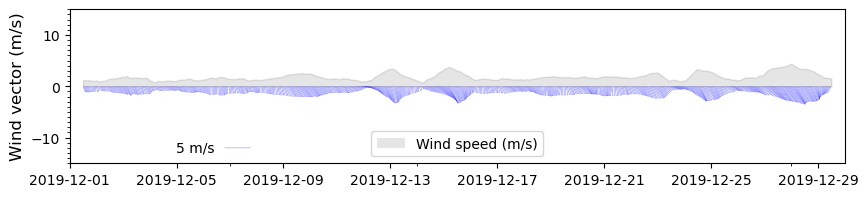

In [7]:
#xlim = (parse("2013-12-25 00:00:00"),parse("2014-01-10 00:00:00"))
vlabel = 'Wind speed (m/s)'
ylabel = 'Wind vector (m/s)'
png_vector = "gwo_hourly_wind.png"
xlim = None
#xlim = (parse("1990-09-02"), parse("1990-09-03"))
dx = 7  # x_minor_locator interval
#ylim = None
ylim = (-15, 15)
dy = 1  # y_minor_locator interval
window=25 # Rolling mean window in odd integer; center: rolling mean at center
magnitude = True  # True: Plot magnitudes, False: No magnitudes

plot_config = gwo.Data1D_PlotConfig(xlim = xlim, ylim = ylim,
              x_minor_locator = DayLocator(interval=dx),
              y_minor_locator = MultipleLocator(dy),
              format_xdata = DateFormatter('%Y-%m-%d'),
              ylabel=ylabel, vlabel=vlabel, vlabel_loc = 'lower center')
gwo.Plot1D(plot_config, wind, window=window, 
           center=True).save_vector_plot(png_vector, 
                                         magnitude = magnitude, dpi=600)

# Plot using [hvPlot](https://hvplot.holoviz.org/)
This is for interactive plotting but not suitable for saving graphics into files.

In [8]:
import hvplot.pandas

In [9]:
data.df[['kion', 'sped']].hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [10]:
def hook(plot, element):
    plot.handles['xaxis'].axis_label_text_font_style = 'normal'
    plot.handles['yaxis'].axis_label_text_font_style = 'normal'

### How to specify options for hvPlot (オプション指定方法)
- Many of the Holoviews options can be specified with the hvPlot argument.
- `hooks` defines the function `hook(plot, element)`, which is specified in hvPlot as `.opts(hooks=[hook])`. Unconfirmed, but it seems that all options can be specified, including Bokeh options that are not defined as arguments in hvPlot or Holoviews.
- 基本的にはhvplotの引数でHoloviewsのオプションの多くが指定できる
- `hooks`は関数`hook(plot, element)`を定義し，hvPlotで`.opts(hooks=[hook])`として指定する．未確認だが，hvPlotやHoloviewsの引数としては定義されていないBokehのオプションを含め，すべてのオプションが指定できそう

In [11]:
'''
## This cell invokes error.
xlim = (parse("2019-12-01"), parse("2019-12-05"))
data.df['kion'].hvplot(xlim=xlim)
'''

'\n## This cell invokes error.\nxlim = (parse("2019-12-01"), parse("2019-12-05"))\ndata.df[\'kion\'].hvplot(xlim=xlim)\n'

In [12]:
data.df['kion']['2019-12-01':'2019-12-05'].hvplot()

:Curve   [index]   (kion)

In [13]:
data.df['kion']['2019-12-01':'2019-12-05'].hvplot(
                       #xlim=(datetime(2019,12,1), datetime(2019,12,20)), 
                       #xticks=10, ylabel='Temperature (degC)',
                       #ylim=(-4,35), yticks=10, width=600, height=200,
                       line_color='red', line_width=0.5,
                       fontsize={'xticks':12,'yticks':12 ,'ylabel':14},
                       title='').opts(hooks=[hook])

:Curve   [index]   (kion)

# Check missing rows in DataFrame.

In [14]:
datetime_ini = "2010-9-2 00:00:00"
datetime_end = "2010-9-2 23:00:00"
stn = "Chiba"
dirpath = "/mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/"

met_check = gwo.Check(datetime_ini=datetime_ini, datetime_end=datetime_end,
                      stn=stn, dirpath=dirpath)
## Create a complete pandas DatetieIndex
datetime_index = pd.date_range(datetime_ini, datetime_end, freq='H')

Start datetime = 2010-09-02 00:00:00
End datetime = 2010-09-02 23:00:00
Reading from /mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/Chiba/Chiba2009.csv
Reading from /mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/Chiba/Chiba2010.csv
Reading from /mnt/d/dat/met/JMA_DataBase/GWO/Hourly2/Chiba/Chiba2011.csv
Original data with no editing


In [15]:
met_check.df.index

DatetimeIndex(['2010-09-02 00:00:00', '2010-09-02 01:00:00',
               '2010-09-02 02:00:00', '2010-09-02 03:00:00',
               '2010-09-02 04:00:00', '2010-09-02 05:00:00',
               '2010-09-02 06:00:00', '2010-09-02 07:00:00',
               '2010-09-02 08:00:00', '2010-09-02 09:00:00',
               '2010-09-02 13:00:00', '2010-09-02 14:00:00',
               '2010-09-02 15:00:00', '2010-09-02 16:00:00',
               '2010-09-02 17:00:00', '2010-09-02 18:00:00',
               '2010-09-02 19:00:00', '2010-09-02 20:00:00',
               '2010-09-02 21:00:00', '2010-09-02 22:00:00',
               '2010-09-02 23:00:00'],
              dtype='datetime64[ns]', freq=None)

In [16]:
datetime_index.values[0] in met_check.df.index.values

True

### Create a mask for extracting missing rows
- [`np.isis(https://numpy.org/doc/stable/reference/generated/numpy.isin.html)`]()
- [`np.logical_not()`](https://numpy.org/doc/stable/reference/generated/numpy.logical_not.html).

In [17]:
mask = np.logical_not(np.isin(datetime_index, met_check.df.index))
datetime_index[mask]

DatetimeIndex(['2010-09-02 10:00:00', '2010-09-02 11:00:00',
               '2010-09-02 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [18]:
mask

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False])